# Python timedelta: 
### Working With Time Intervals in Python

In Python, timedelta is a data type within the datetime module used to represent durations or differences between two points in time.
---------------------------------------------------------------------

---------------------------------------------------------------------
Many real-world datasets include dates and times, and a common operation in data science is to calculate the time difference between two points in time.

The units we use to measure dates and times (years, months, days, hours, minutes, seconds) are not the easiest to work with, especially when these units have irregular lengths.

However, Python's timedelta data type, which is part of the datetime module, deals with the complexities of working out time intervals.

Let’s start with a very short answer on what is Python’s timedelta and then continue with more details.

In [2]:
import pandas as pd
import datetime

**Short Answer: What Is Python's timedelta**
The two most important and frequently used data types from the datetime module are timedelta and datetime. While datetime objects represent specific points in time (e.g., January 1st, 2024 at 10:30 AM), timedelta objects represent durations or intervals between two points. Think of it as the difference between asking "When?" (datetime) and "How long?" (timedelta).

Consider two dates, which we can represent using two datetime objects. Subtracting one date from another creates a timedelta object representing the time interval between the dates :

In [4]:
import datetime

first_date = datetime.datetime(year=2024, month=1, day=1)
second_date = datetime.datetime(year=2024, month=5, day=27)
interval = second_date - first_date
print(interval)

147 days, 0:00:00


The output shows the two dates are exactly 147 days apart. In the following example, we use the date and time when the code is executed by calling datetime.datetime.now():

In [5]:
first_date = datetime.datetime(year=2024, month=1, day=1)
second_date = datetime.datetime.now()
interval = second_date - first_date

print(second_date)
print(interval)

2024-08-20 07:49:58.081426
232 days, 7:49:58.081426


The timedelta object now shows the time elapsed between the start of 2024 and the date and time when the code is executed.

In the previous section, we created a timedelta object from two datetime objects, but we can also create a time interval directly by calling the timedelta() constructor:

In [6]:
interval = datetime.timedelta(days=10, seconds=3600)
print(interval)

10 days, 1:00:00


The interval is ten days and one hour long. We can also use other time units when creating a timedelta instance:

In [7]:
interval = datetime.timedelta(weeks=1, days=3, hours=1)
print(interval)

10 days, 1:00:00


**Any of the following time units are valid when calling timedelta():**

- weeks
- days
- hours
- minutes
- seconds
- milliseconds
- microseconds

## Basic Arithmetic With timedelta:

We can also perform arithmetic operations with timedelta objects. Consider the following three datetime objects, representing the release dates for Python 1.0, Python 2.0, and Python 3.0. Subtracting datetime objects from each other creates a timedelta object:

In [9]:
release_date_python_1 = datetime.datetime(year=1991, month=2, day=20)
release_date_python_2 = datetime.datetime(year=2000, month=10, day=16)
release_date_python_3 = datetime.datetime(year=2008, month=12, day=3)

time_between_1_and_2 = release_date_python_2 - release_date_python_1
time_between_2_and_3 = release_date_python_3 - release_date_python_2

print(time_between_1_and_2)
print(time_between_2_and_3)

3526 days, 0:00:00
2970 days, 0:00:00


The output shows the number of days between the releases of Python 1.0 and 2.0 and between the releases of Python 2.0 and 3.0. The time intervals are timedelta objects.

It's also possible to perform addition and subtraction between timedelta objects and datetime objects. Let's add a timedelta with days=100 to release_date_python_3:

In [10]:
print(release_date_python_3 + datetime.timedelta(days=100))

2009-03-13 00:00:00


Python 3.0 was released on December 3, 2008. Adding one hundred days to this date takes us to March 13, 2009.

However, we can also perform arithmetic operations directly with timedelta objects:

In [11]:
print("Difference between gap 1 and gap 2")
print(time_between_1_and_2 - time_between_2_and_3)

print("Sum of gap 1 and gap 2")
print(time_between_1_and_2 + time_between_2_and_3)

Difference between gap 1 and gap 2
556 days, 0:00:00
Sum of gap 1 and gap 2
6496 days, 0:00:00


The output confirms it's possible to subtract and add timedelta objects. Multiplication and division are also possible:

In [12]:
print("Multiply time interval by 3:")
print(time_between_1_and_2 * 3)

print("Divide time interval by 3:")
print(time_between_1_and_2 / 3)

Multiply time interval by 3:
10578 days, 0:00:00
Divide time interval by 3:
1175 days, 8:00:00


## Key timedelta Attributes and Methods
A timedelta object represents a time interval by storing the number of days, seconds and microseconds. These three units are the only time units represented by attributes in the timedelta class:

In [13]:
interval = datetime.timedelta(
    weeks=1,
    hours=10,
    minutes=22,
    milliseconds=1042,
)

print(f"{interval = }")
print(f"{interval.days = }")
print(f"{interval.seconds = }")
print(f"{interval.microseconds = }")

interval = datetime.timedelta(days=7, seconds=37321, microseconds=42000)
interval.days = 7
interval.seconds = 37321
interval.microseconds = 42000


Even though the call to timedelta() includes arguments for weeks, hours, minutes, and milliseconds, the constructor converts these units to days, seconds, and microseconds. The print() calls include f-strings with an equals sign = to display the variable name and its value. **You can learn more about f-strings in this tutorial on f-string formatting in Python.**

Another useful tool of the timedelta class is the total_seconds() method. This method returns the total time interval in seconds:

In [ ]:
print("Total time interval in seconds:")
print(interval.total_seconds())

## timedelta Example: Calculating Growth
Let's look at an example. A company's online store that sells Python books logs all the sales. Here's the data for one customer:

In [14]:
data = {
    "customer_id": 3542,
    "sales": [
        {"date": "2024-04-21T13:23:45", "price": 24.99, "quantity": 1},
        {"date": "2024-02-13T10:54:12", "price": 24.99, "quantity": 2},
        {"date": "2024-01-08T20:32:24", "price": 18.99, "quantity": 1},
    ],
}
sales = data["sales"]
dates = []
for item in sales:
    date = datetime.datetime.fromisoformat(item["date"])
    dates.append(date)

print(dates)


[datetime.datetime(2024, 4, 21, 13, 23, 45), datetime.datetime(2024, 2, 13, 10, 54, 12), datetime.datetime(2024, 1, 8, 20, 32, 24)]


The list dates contains datetime objects with the dates of each order. Finally, we can calculate the time interval between the first and last order:

In [15]:
time_span = dates[0] - dates[-1]
print(time_span)
print(time_span.days)

103 days, 16:51:21
103


# Time Series Analysis and Quality Problem Solving using Pandas and Datetime

## 1. Introduction to Time Series Analysis:

- **Definition:** Time series data is a sequence of data points collected or recorded at regular time intervals.

- **Importance:** Time series analysis is crucial in various fields like finance, economics, environmental science, and quality control to identify trends, seasonality, and anomalies.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Converting Strings to Datetime
Converting a string column to datetime:

In [18]:
data = {'date': ['2024-01-01', '2024-01-02', '2024-01-03']}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df

,date
0,2024-01-01
1,2024-01-02
2,2024-01-03


## 2 Extracting Date Components
Extracting year, month, day, etc.

In [19]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,year,month,day
0,2024-01-01,2024,1,1
1,2024-01-02,2024,1,2
2,2024-01-03,2024,1,3


## 3 Handling Time Zones
Converting to a specific timezone

In [20]:
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df

,date,year,month,day
0,2023-12-31 19:00:00-05:00,2024,1,1
1,2024-01-01 19:00:00-05:00,2024,1,2
2,2024-01-02 19:00:00-05:00,2024,1,3


In [32]:
url = 'https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/server_util.csv'
df = pd.read_csv(url,parse_dates=['datetime'])
print(df.head())

             datetime  server_id  cpu_utilization  free_memory  session_count
0 2019-03-06 00:00:00        100             0.40         0.54             52
1 2019-03-06 01:00:00        100             0.49         0.51             58
2 2019-03-06 02:00:00        100             0.49         0.54             53
3 2019-03-06 03:00:00        100             0.44         0.56             49
4 2019-03-06 04:00:00        100             0.42         0.52             54


In [33]:
df.set_index('datetime', inplace=True)

In [34]:
df_monthly = df.resample('M').mean()
print(df_monthly.head())


            server_id  cpu_utilization  free_memory  session_count
datetime                                                          
2019-03-31      124.5         0.620580      0.37908      69.143301
2019-04-30      124.5         0.620513      0.37948      69.117500


/tmp/ipykernel_33/3275460887.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


# Time Series Analysis with Pandas
## Sample DataFrame Creation
We will now create a new sample DataFrame to simulate real-world time series data:

In [36]:
date_rng = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
np.random.seed(42)
data = {
    'Date': date_rng,
    'value': np.random.normal(loc=50, scale=10, size=len(date_rng))
}
df = pd.DataFrame(data)
df.loc[df.sample(frac=0.1).index, 'value'] = np.nan  # Introduce some missing values
print(df.head())


        Date      value
0 2024-01-01  54.967142
1 2024-01-02        NaN
2 2024-01-03  56.476885
3 2024-01-04  65.230299
4 2024-01-05  47.658466


## Resampling and Aggregating Data

In [37]:
df.set_index('Date', inplace=True)
df_monthly = df.resample('M').mean()
print(df_monthly.head())

                value
Date                 
2024-01-31  48.430511
2024-02-29  47.829263
2024-03-31  49.916919
2024-04-30  49.082604
2024-05-31  49.045509


/tmp/ipykernel_33/3427681995.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


## Rolling Statistics
Calculate moving averages and rolling statistics:


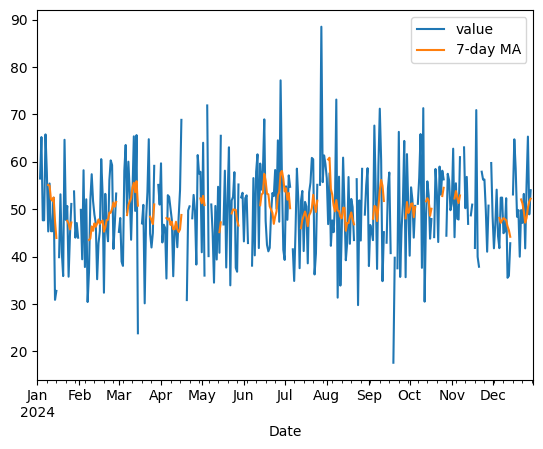

In [38]:
df['7-day MA'] = df['value'].rolling(window=7).mean()
df[['value', '7-day MA']].plot()
plt.show()


# Solving Quality Problems in Time Series

## Sample DataFrame Creation
For quality problem-solving, let's create another DataFrame focusing on specific issues:

In [39]:
data = {
    'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'value': [10, 20, 15, np.nan, 25, 100, 15, 20, 18, np.nan]
}
df = pd.DataFrame(data)
print(df)


        date  value
0 2024-01-01   10.0
1 2024-01-02   20.0
2 2024-01-03   15.0
3 2024-01-04    NaN
4 2024-01-05   25.0
5 2024-01-06  100.0
6 2024-01-07   15.0
7 2024-01-08   20.0
8 2024-01-09   18.0
9 2024-01-10    NaN


## Detecting Missing Data
Check for missing values:

In [40]:
missing = df.isnull().sum()
print(missing)

date     0
value    2
dtype: int64


Fill missing values using forward fill:

In [42]:
df_filled = df.fillna(method='ffill')
df_filled

/tmp/ipykernel_33/685454775.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


,date,value
0,2024-01-01,10.0
1,2024-01-02,20.0
2,2024-01-03,15.0
3,2024-01-04,15.0
4,2024-01-05,25.0
5,2024-01-06,100.0
6,2024-01-07,15.0
7,2024-01-08,20.0
8,2024-01-09,18.0
9,2024-01-10,18.0


# Creating the Time-Series DataFrame
First, let’s create a DataFrame by reading data from a CSV file containing critical information associated with 50 servers recorded hourly for 34 consecutive days:

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/server_util.csv')
display(df.head())

,datetime,server_id,cpu_utilization,free_memory,session_count
0,2019-03-06 00:00:00,100,0.40,0.54,52
1,2019-03-06 01:00:00,100,0.49,0.51,58
2,2019-03-06 02:00:00,100,0.49,0.54,53
3,2019-03-06 03:00:00,100,0.44,0.56,49
4,2019-03-06 04:00:00,100,0.42,0.52,54


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40800 entries, 0 to 40799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         40800 non-null  object 
 1   server_id        40800 non-null  int64  
 2   cpu_utilization  40800 non-null  float64
 3   free_memory      40800 non-null  float64
 4   session_count    40800 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ MB
None


In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40800 entries, 0 to 40799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         40800 non-null  datetime64[ns]
 1   server_id        40800 non-null  int64         
 2   cpu_utilization  40800 non-null  float64       
 3   free_memory      40800 non-null  float64       
 4   session_count    40800 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 MB
None


Now, the data type of the datetime column is a datetime64[ns]object. The [ns] means the nano second-based time format that specifies the precision of the DateTime object.

Also, we can let the pandas read_csv() method parse certain columns as DataTime objects, which is more straightforward than using the to_datetime() method. Let's try it:

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/server_util.csv', parse_dates=['datetime'])
print(df.head())

             datetime  server_id  cpu_utilization  free_memory  session_count
0 2019-03-06 00:00:00        100             0.40         0.54             52
1 2019-03-06 01:00:00        100             0.49         0.51             58
2 2019-03-06 02:00:00        100             0.49         0.54             53
3 2019-03-06 03:00:00        100             0.44         0.56             49
4 2019-03-06 04:00:00        100             0.42         0.52             54


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40800 entries, 0 to 40799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         40800 non-null  datetime64[ns]
 1   server_id        40800 non-null  int64         
 2   cpu_utilization  40800 non-null  float64       
 3   free_memory      40800 non-null  float64       
 4   session_count    40800 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 MB


Running the code above creates a DataFrame where the data type of the datetime column is a DateTime object.

Before heading to the next section, let’s apply some basic methods to the datetime column.

First, let’s see how we can return the earliest and latest dates in the DataFrame. To do this, we can simply apply the max() and min() methods on the datetime column, as follows:

In [57]:
display(df.datetime.min())
display(df.datetime.max())

Timestamp('2019-03-06 00:00:00')

Timestamp('2019-04-08 23:00:00')

To select the DataFrame rows between two specific dates, we can create a Boolean mask and use the .loc method to filter rows within a certain date range:

In [58]:
mask = (df.datetime >= pd.Timestamp('2019-03-06')) & (df.datetime < pd.Timestamp('2019-03-07'))
display(df.loc[mask])

,datetime,server_id,cpu_utilization,free_memory,session_count
0,2019-03-06 00:00:00,100,0.40,0.54,52
1,2019-03-06 01:00:00,100,0.49,0.51,58
2,2019-03-06 02:00:00,100,0.49,0.54,53
3,2019-03-06 03:00:00,100,0.44,0.56,49
4,2019-03-06 04:00:00,100,0.42,0.52,54
...,...,...,...,...,...
40003,2019-03-06 19:00:00,149,0.74,0.24,81
40004,2019-03-06 20:00:00,149,0.73,0.23,81
40005,2019-03-06 21:00:00,149,0.79,0.29,83
40006,2019-03-06 22:00:00,149,0.73,0.29,82


# Slicing Time Series
To make Timestamp slicing possible, we need to set the datetime column as the index of the DataFrame. To set a column as an index of a DataFrame, use the set_index method:

In [59]:
df.set_index('datetime', inplace=True)
print(df.loc['2019-03-07 02:00:00'].head(5)) #To select all the rows equal to a single index using the .loc method:

                     server_id  cpu_utilization  free_memory  session_count
datetime                                                                   
2019-03-07 02:00:00        100             0.44         0.50             56
2019-03-07 02:00:00        101             0.78         0.21             87
2019-03-07 02:00:00        102             0.75         0.27             80
2019-03-07 02:00:00        103             0.76         0.28             85
2019-03-07 02:00:00        104             0.74         0.24             77


The selection string can be any standard date format, let’s look at some examples:

In [61]:
df.loc['Apr 2019']

,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-04-01 00:00:00,100,0.49,0.55,52
2019-04-01 01:00:00,100,0.44,0.53,52
2019-04-01 02:00:00,100,0.46,0.53,47
2019-04-01 03:00:00,100,0.42,0.53,55
2019-04-01 04:00:00,100,0.46,0.54,51
...,...,...,...,...
2019-04-08 19:00:00,149,0.73,0.20,81
2019-04-08 20:00:00,149,0.75,0.25,83
2019-04-08 21:00:00,149,0.80,0.26,82


In [62]:
df.loc['8th April 2019']

,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-04-08 00:00:00,100,0.43,0.54,51
2019-04-08 01:00:00,100,0.49,0.49,51
2019-04-08 02:00:00,100,0.46,0.53,61
2019-04-08 03:00:00,100,0.44,0.51,55
2019-04-08 04:00:00,100,0.49,0.55,53
...,...,...,...,...
2019-04-08 19:00:00,149,0.73,0.20,81
2019-04-08 20:00:00,149,0.75,0.25,83
2019-04-08 21:00:00,149,0.80,0.26,82


In [63]:
df.loc['April 05, 2019 5pm']

,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-04-05 17:00:00,100,0.53,0.51,48
2019-04-05 17:00:00,101,0.82,0.20,88
2019-04-05 17:00:00,102,0.73,0.25,82
2019-04-05 17:00:00,103,0.76,0.26,80
2019-04-05 17:00:00,104,0.73,0.25,77
2019-04-05 17:00:00,105,0.47,0.43,56
2019-04-05 17:00:00,106,0.45,0.53,55
2019-04-05 17:00:00,107,0.72,0.38,74
2019-04-05 17:00:00,108,0.78,0.26,80


## Resampling Time Series Data

- The logic behind the resample() method is similar to the groupby() method. It groups data within any possible period. Although we can use the resample() method for both upsampling and downsampling, we'll focus on how to use it to perform downsampling, which reduces the frequency of time-series data — for instance, converting hourly time-series data to daily or daily time-series data to monthly.

- The following example returns the average CPU utilization, free memory, and active session count of server ID 100 each day. To do that, we need first to filter the DataFrame's rows with server ID 100, then we resample the hourly data to daily data. Finally, apply the mean() method on the result to get the daily average of the three metrics:

In [64]:
df[df.server_id == 100].resample('D')['cpu_utilization', 'free_memory', 'session_count'].mean()

,cpu_utilization,free_memory,session_count
datetime,,,
2019-03-06,0.470417,0.535417,53.000000
2019-03-07,0.455417,0.525417,53.666667
2019-03-08,0.478333,0.532917,54.541667
2019-03-09,0.472917,0.523333,54.166667
2019-03-10,0.465000,0.527500,54.041667
2019-03-11,0.469583,0.528750,53.916667
2019-03-12,0.475000,0.533333,53.750000
2019-03-13,0.462917,0.521667,52.541667
2019-03-14,0.472083,0.532500,54.875000


In [65]:
df.groupby(df.server_id).resample('M')['cpu_utilization', 'free_memory'].max()

/tmp/ipykernel_33/4193360443.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(df.server_id).resample('M')['cpu_utilization', 'free_memory'].max()


cpu_utilization  free_memory
server_id datetime                                
100       2019-03-31             0.56         0.62
          2019-04-30             0.55         0.61
101       2019-03-31             0.91         0.32
          2019-04-30             0.89         0.30
102       2019-03-31             0.85         0.36
...                               ...          ...
147       2019-04-30             0.61         0.57
148       2019-03-31             0.84         0.35
          2019-04-30             0.83         0.34
149       2019-03-31             0.85         0.36
          2019-04-30             0.83         0.34

[100 rows x 2 columns]